<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Manipulación de videos </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/opencv_reading_mp4_video.png" align="middle" style="width:550px;"/></td>
<td>

OpenCV(Open Source Computer Vision) es una biblioteca de visión por computadora que contiene varias funciones para realizar operaciones en imágenes o videos. La biblioteca OpenCV se puede utilizar para realizar múltiples operaciones en videos.
    
    
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [3]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# 1. Usando el detector Haar Cascade
## a) Detección de rostros

<function matplotlib.pyplot.show(close=None, block=None)>

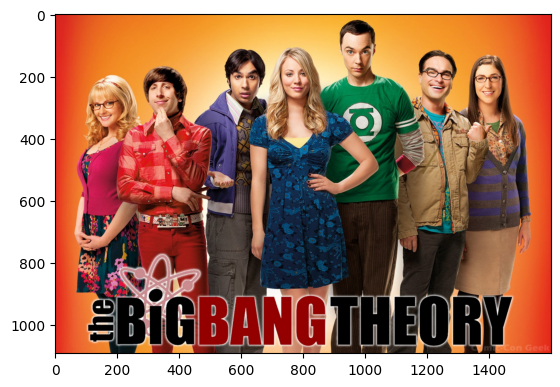

In [4]:
#Mostramos la imagen original
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

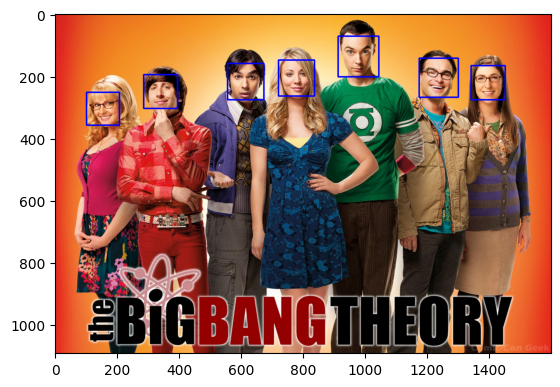

In [6]:
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
detector_rostros=cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
rostros = detector_rostros.detectMultiScale(img_gris, scaleFactor=1.1, minNeighbors=10)
for (x, y, w, h) in rostros:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
plt.imshow(img)
plt.show()

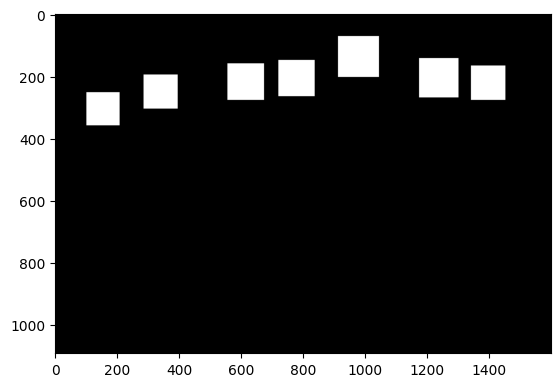

In [7]:
# mascara
mascara = np.zeros(img.shape[:2], dtype="uint8")
for (x, y, w, h) in rostros:
    cv.rectangle(mascara, (x, y), (x+w, y+h), 255, -1)
plt.imshow(mascara, cmap='gray')
plt.show()


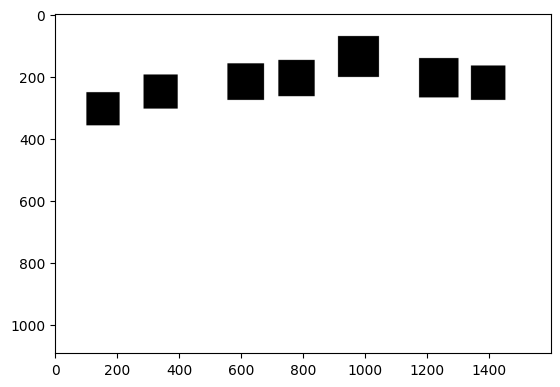

In [8]:
# mascara inversa
mascara_inv = cv.bitwise_not(mascara)
plt.imshow(mascara_inv, cmap='gray')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

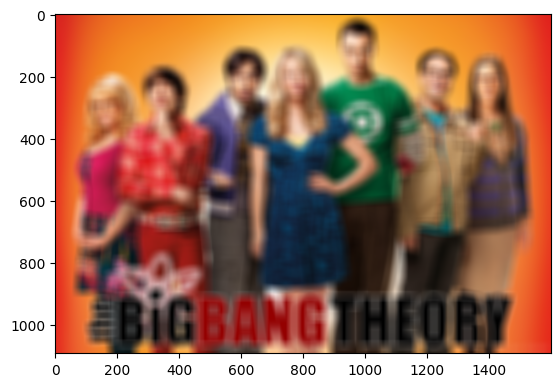

In [11]:
#Mostramos la imagen original con difuminado
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_blur = cv.blur(img, (35,35))
plt.imshow(img_blur)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

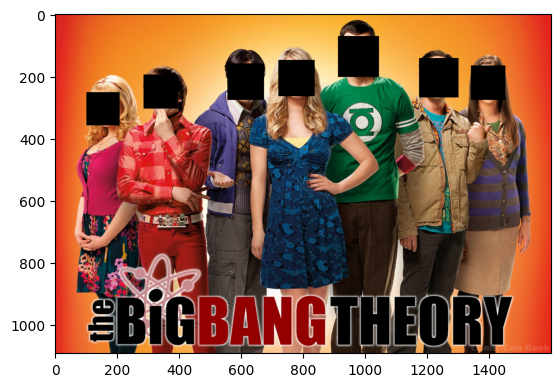

In [12]:
# Imagen 1
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_ConMascara = cv.bitwise_and(img, img, mask=mascara_inv)
plt.imshow(img_ConMascara)
plt.show

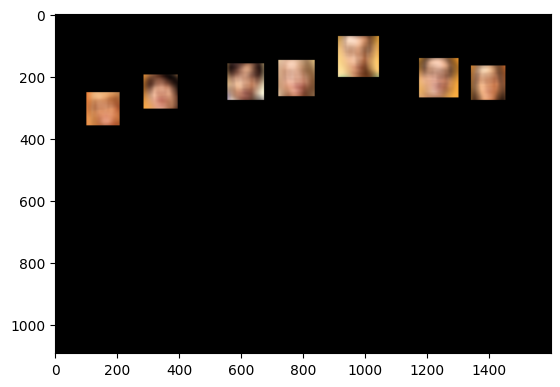

In [13]:
# Imagen 2
img_blur_ConMascara = cv.bitwise_and(img_blur, img_blur, mask=mascara)
plt.imshow(img_blur_ConMascara)
plt.show()

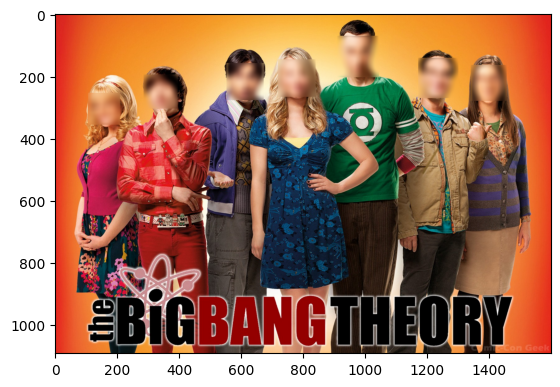

In [ ]:
# Imagen Final
img_final = cv.add(img_ConMascara, img_blur_ConMascara)
plt.imshow(img_final)
plt.show()

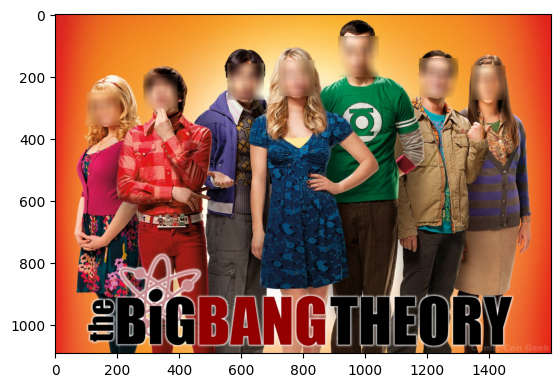

In [24]:
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
detector_rostros=cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
rostros = detector_rostros.detectMultiScale(img_gris, scaleFactor=1.1, minNeighbors=10)
mascara = np.zeros(img.shape[:2], dtype="uint8")
for (x, y, w, h) in rostros:
    cv.rectangle(mascara, (x, y), (x+w, y+h), 255, -1)
mascara_inv = cv.bitwise_not(mascara)
img_blur = cv.blur(img, (35,35))
img_ConMascara = cv.bitwise_and(img, img, mask=mascara_inv)
img_blur_ConMascara = cv.bitwise_and(img_blur, img_blur, mask=mascara)
img_final = cv.add(img_ConMascara, img_blur_ConMascara)
plt.imshow(img_final)
plt.show()

# Reproducir  el video

In [34]:
# Usar el vide llamado videos/final.mp4
# y despues probar con la cámara web (0)


video = cv.VideoCapture('videos/final.mp4') #videos/final.mp4' para video de archivo y 0 para webcam
detector_rostros = cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
fraccion= 0.5
while(video.isOpened()):
    ret, frame = video.read()
    #ret es una  variable booleana, true -> existe imagen , false -> No existe (final de video)
    if ret:
        #cv.imshow("video original", frame)
        img = frame.copy()
        
        columnas= int(img.shape[1]*fraccion)
        filas= int(img.shape[0]*fraccion)
        img = cv.resize(img, (columnas, filas), interpolation = cv.INTER_NEAREST)

        img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        rostros = detector_rostros.detectMultiScale(img_gris, scaleFactor=1.1, minNeighbors=10)
        mascara = np.zeros(img.shape[:2], dtype="uint8")
        for (x, y, w, h) in rostros:
            cv.rectangle(mascara, (x, y), (x+w, y+h), 255, -1)
        mascara_inv = cv.bitwise_not(mascara)
        img_blur = cv.blur(img, (35,35))
        img_ConMascara = cv.bitwise_and(img, img, mask=mascara_inv)
        img_blur_ConMascara = cv.bitwise_and(img_blur, img_blur, mask=mascara)
        img_final = cv.add(img_ConMascara, img_blur_ConMascara)
        cv.imshow("video con caras difuminadas", img_final)

         #Presiona la letra 'q' para salir
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
video.release()
cv.destroyAllWindows()

# 2. Usando las redes neuronales para detectar rostros